In [2]:
# author: Vladimir Osin

## Pandas

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. It is already well on its way toward this goal.

**Note:** 
- Pandas is essential high level data manipulation tool, built on Numpy
- Documentation [here](http://pandas.pydata.org/pandas-docs/stable/index.html)
- 10 minutes tutorial [here](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## DataFrame - tabular data structure with rows and columns

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# DataFrame is one of Pandas' most important data structures
# Let's build DataFrame from a dictionary

# data lists
student_names = ['John', 'Arnold', 'Donald']
age           = [23, 46, 31]
salary        = [30000, 60000, 40000]

# data dict
data_dict = {'student_names': student_names, 'age': age, 'salary': salary} 

# and finally DataFrame
data_frame = pd.DataFrame(data_dict)

In [43]:
data_frame

,student_names,age,salary
0,John,23,30000
1,Arnold,46,60000
2,Donald,31,40000


In [80]:
type(data_frame), data_frame.shape, data_frame.columns

(pandas.core.frame.DataFrame,
 (3, 3),
 Index(['student_names', 'age', 'salary'], dtype='object'))

In [44]:
# csv to DataFrame (dataset from here https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home)
df_ibm = pd.read_csv('../Datasets/ibm_hr_analytics_employee_attrition_performance.csv')
df_ibm.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [81]:
df_ibm.tail(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [45]:
# get general info about data
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [66]:
# select few columns for analysis
df_ibm_subset = df_ibm[['MonthlyIncome', 'Gender', 'Age', 'Attrition', 'EmployeeNumber']].copy()

# let's make non-integer index based on employee number
df_ibm_subset['MonthlyIncome'] = df_ibm_subset['MonthlyIncome'].astype('str')
df_ibm_subset.set_index('MonthlyIncome', inplace=True)

In [68]:
# square brackets selection (columns selection, slicing for rows)
df_ibm_subset[1:5]

,Gender,Age,Attrition,EmployeeNumber
MonthlyIncome,,,,
5130,Male,49,No,2
2090,Male,37,Yes,4
2909,Female,33,No,5
3468,Male,27,No,7


In [62]:
# label-based selection (row, column, row and column access)
df_ibm_subset.loc[['2426', '2911'], ['Gender', 'Age']]

,Gender,Age
MonthlyIncome,,
2426,Male,35
2911,Male,31
2911,Female,33


In [77]:
# integer-based selection 
df_ibm_subset.iloc[:5, :]

,Gender,Age,Attrition,EmployeeNumber
MonthlyIncome,,,,
5993,Female,41,Yes,1
5130,Male,49,No,2
2090,Male,37,Yes,4
2909,Female,33,No,5
3468,Male,27,No,7


In [87]:
# filtering pandas Data Frame
ind = df_ibm_subset['EmployeeNumber'] < 10
df_ibm_subset[ind]

,Gender,Age,Attrition,EmployeeNumber
MonthlyIncome,,,,
5993,Female,41,Yes,1
5130,Male,49,No,2
2090,Male,37,Yes,4
2909,Female,33,No,5
3468,Male,27,No,7
3068,Male,32,No,8


In [99]:
# few more ways to filter 
df_ibm_subset[np.logical_and(df_ibm_subset.Age > 35, df_ibm_subset.EmployeeNumber < 10)]

df_ibm_subset[(df_ibm_subset.Age > 35) & (df_ibm_subset.EmployeeNumber < 10)] # &, |, ~  

,Gender,Age,Attrition,EmployeeNumber
MonthlyIncome,,,,
5993,Female,41,Yes,1
5130,Male,49,No,2
2090,Male,37,Yes,4


,Gender,Age,Attrition,EmployeeNumber
MonthlyIncome,,,,
5993,Female,41,Yes,1
5130,Male,49,No,2
2090,Male,37,Yes,4


In [112]:
# looping over Data Frame
for ind, row in df_ibm_subset[:5].iterrows():
    print(row['Age'], row['Attrition'])

41 Yes
49 No
37 Yes
33 No
27 No


In [113]:
for ind, row in df_ibm_subset[:5].iterrows():
    df_ibm_subset.loc[ind, 'EmployeeNumberSquared'] = row['EmployeeNumber']**2
    
df_ibm_subset['EmployeeNumberSquared'] = df_ibm_subset['EmployeeNumber'].apply(lambda x: x**2)
df_ibm_subset[:10]

,Gender,Age,Attrition,EmployeeNumber,EmployeeNumberSquared
MonthlyIncome,,,,,
5993,Female,41,Yes,1,1
5130,Male,49,No,2,4
2090,Male,37,Yes,4,16
2909,Female,33,No,5,25
3468,Male,27,No,7,49
3068,Male,32,No,8,64
2670,Female,59,No,10,100
2693,Male,30,No,11,121
9526,Male,38,No,12,144


## Ploting with Pandas 

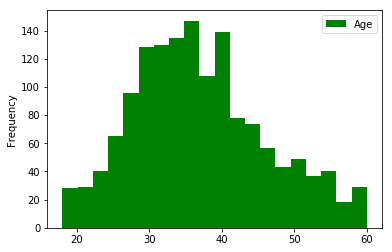

In [144]:
plot_1 = df_ibm.Age.plot(kind='hist', bins=20, color='g', legend=True)

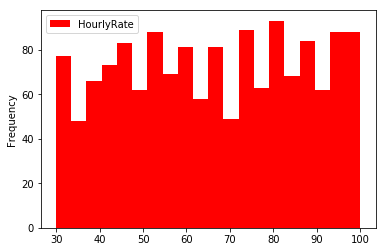

In [145]:
plot_2 = df_ibm.HourlyRate.plot(kind='hist', bins=20, color='r', legend=True)

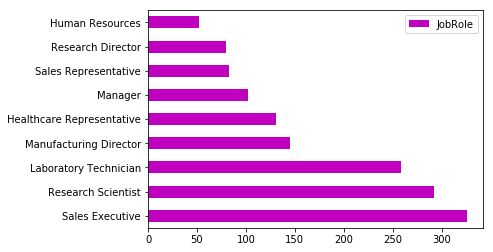

In [146]:
plot_3 = df_ibm.JobRole.value_counts().plot(kind='barh', color='m', legend=True)

In [148]:
# save figure
fig = plot_1.get_figure()
fig.savefig("age_histogram.png")